# Motion of charged particle in E and B fields

Start of by importing numpty and pyplot. The line magic function (indicated by %) ensures plots appear in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Basic idea: use Euler method to look at motion of particle in electric and magnetic fields.
Define proton mass and charge, B field, E field, initial position and velocity.

In [61]:
mP = 1.67E-27 # kg
qP = 1.6E-19 # C
c = 3.0E8 # m/s
Bvec = np.zeros(3)
Bvec[0] = 0
Bvec[1] = 0
Bvec[2] = 2 # T
Evec = np.zeros(3)
Evec[0] = 0
Evec[1] = 3000E3 # V/m
Evec[2] = 0
rVec = np.zeros(3)
rVec[0] = 0
rVec[1] = 0
rVec[2] = 0
vVec = np.zeros(3)
vVec[0] = c/10
vVec[1] = 0
vVec[2] = c/20

Force given by $\vec{F} = q \vec{E} + q \vec{v} \times \vec{B}$. Algorithm used for numerical solution is:
$$
\begin{align}
d\vec{v}_i &= \frac{dt}{m}\left( q \vec{E}_i + q \vec{v}_i \times \vec{B} \right), \\
\vec{r}_{i+1} &= \vec{r}_i + dt\vec{v}_i, \\
\vec{v}_{i+1} &= \vec{v}_i + d\vec{v}_i.
\end{align}
$$
Set up number of iterations, time step, arrays for storing position and velocity as a function of time. Then loop to determine position and velocity in small time steps and plot the result.

Initial position  [  5.36  -0.03  55.5 ]
Initial velocity  [ 24521215.7   37349360.44  15000000.  ]
Time step 1e-12 s and total time 1e-07 s.


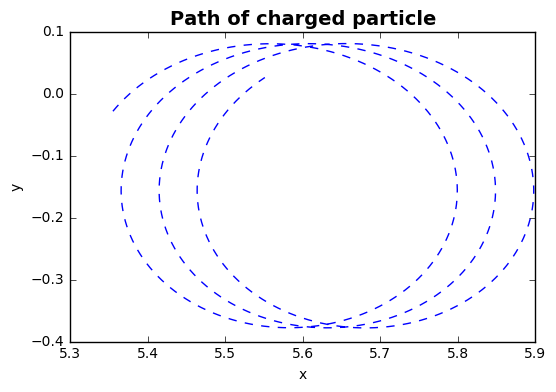

In [101]:
nIter = 100000
dt = 1E-12 # secs
rX = np.zeros(nIter)
dvVec = np.zeros(3)
#
rX = np.zeros(nIter)
rY = np.zeros(nIter)
rZ = np.zeros(nIter)
#
vX = np.zeros(nIter)
vY = np.zeros(nIter)
vZ = np.zeros(nIter)
#
print("Initial position ",np.array_str(rVec,precision=2,suppress_small=True))
print("Initial velocity ",np.array_str(vVec,precision=2,suppress_small=True))
print("Time step {:0.2} s and total time {:0.2} s.".format(dt,nIter*dt))
#
for i in range(0,nIter):
    rX[i] = rVec[0]
    rY[i] = rVec[1]
    rZ[i] = rVec[2]
#
    vX[i] = vVec[0]
    vY[i] = vVec[1]
    vZ[i] = vVec[2]
#
    dvVec = (qP*Evec + qP*np.cross(vVec,Bvec))*dt/mP
    rVec = rVec + dt*vVec
    vVec = vVec + dvVec
#
plt.plot(rX,rY,"b--")
# plt.xlim([-0.6,0.6])
# plt.ylim([-0.6,0.3])
ax = plt.gca()
ax.set_title("Path of charged particle", size = 14, weight = "bold")
ax.set_xlabel("x")
ax.set_ylabel("y")

Plot position in 3D.

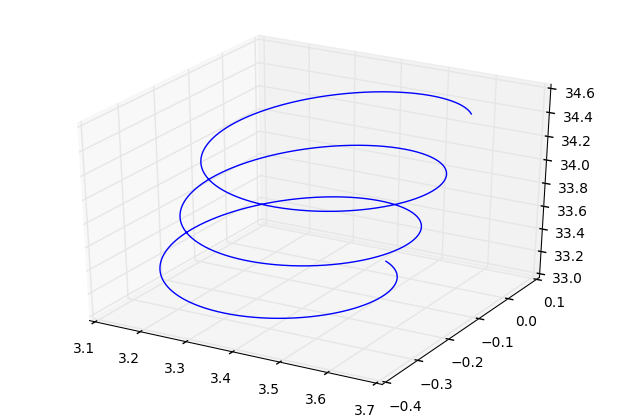

In [73]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(rX,rY,rZ)

Plot velocity.

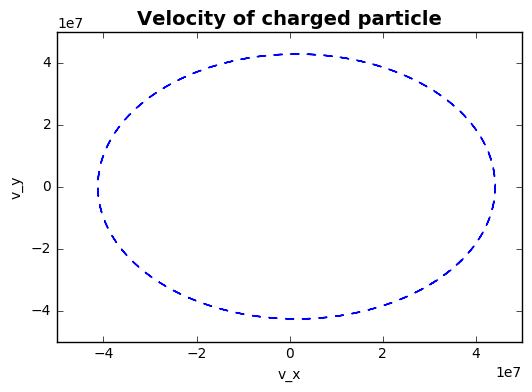

In [74]:
plt.plot(vX,vY,"b--")
# plt.xlim([-0.6,0.6])
# plt.ylim([-0.6,0.3])
ax = plt.gca()
ax.set_title("Velocity of charged particle", size = 14, weight = "bold")
ax.set_xlabel("v_x")
ax.set_ylabel("v_y")

Plot velocity in 3D.

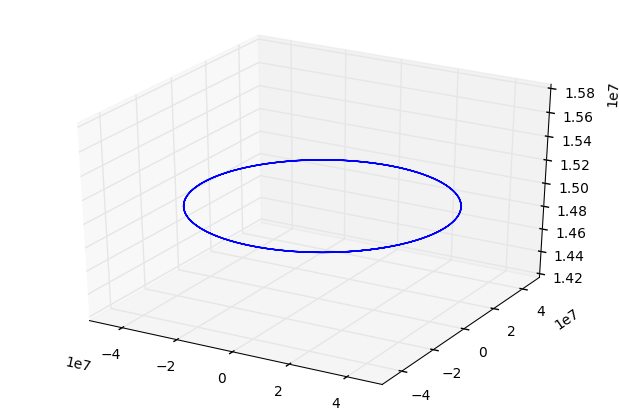

In [75]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(vX,vY,vZ)